## This handles post experimental data processing for the pilot experiment 

In [2]:
# First import the necessary libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')

from Experiment_pointer.experimentFunctions import *

First we start with some open loop analysis 

In [3]:
# Set the save game location
# Must have format of "../PointerExperimentData/Name_dd_mm__hh_mm_metadata" with no file extension
saveGameLocation =  "../PointerExperimentData/Thanh_26_01__10_23"


First extract the r2 value for each decoder

In [4]:
"""
Train decoders
"""
print(os.getcwd())

# A : Linear : 0.01: no ignore
modelA_dict = fitModelToData(mode = 'RigidBodiesSetA',tester = 'linear', \
compPca = None,savePath=saveGameLocation, colorMap=colorMap,plot=False,DOFOffset= 0.01,ignoreTargetMotionTimesLessThan=0)
decoderAColor = (245,5,5) # (RGB) or F50505 (Hex)
decoderAColorPlt = (245/255,5/255,5/255) # (RGB) or F50505 (Hex)
decoderAColorbar = 'rgb(245,5,5)'
# Save model 
np.savez(saveGameLocation + '_linearRigidBodyAModel.npz', modelCoeff = modelA_dict['Coeff'],modelIntercept = modelA_dict['Intercept'],minDOF = modelA_dict['MinDOF'],
        maxDOF = modelA_dict['MaxDOF'], DOFOffset = modelA_dict['DOFOffset'], predCursorPos = modelA_dict['PredCursorPos'])

# # B : Linear : 0.01 :ignore > 600
modelB_dict = fitModelToData(mode = 'RigidBodiesSetB',tester = 'linear', \
compPca = None,savePath=saveGameLocation, colorMap=colorMap,plot=False,DOFOffset= 0.01,ignoreTargetMotionTimesLessThan=600)

decoderBColor = (53,5,245) # (RGB) or #3505F5 (Hex)
decoderBColorPlt = (53/255,5/255,245/255) # (RGB) or #3505F5 (Hex)
decoderBColorbar = 'rgb(53,5,245)'
# Save model 
np.savez(saveGameLocation + '_linearRigidBodyBModel.npz', modelCoeff = modelB_dict['Coeff'],modelIntercept = modelB_dict['Intercept'],minDOF = modelB_dict['MinDOF'],
        maxDOF = modelB_dict['MaxDOF'], DOFOffset = modelB_dict['DOFOffset'], predCursorPos = modelB_dict['PredCursorPos'])


# # C : Linear : 0.05 :ignore > 0
modelC_dict = fitModelToData(mode = 'RigidBodiesSetC',tester = 'linear', \
compPca = None, savePath=saveGameLocation,colorMap=colorMap,plot=False,DOFOffset= 0.05,ignoreTargetMotionTimesLessThan=0)


decoderCColor = (2,250,242) # (RGB) or  #02FAF2 (Hex)
decoderCColorPlt = (2/255,250/255,242/255) # (RGB) or  #02FAF2 (Hex)
decoderCColorbar = 'rgb(2,250,242)'
# Save model 
np.savez( saveGameLocation + '_linearRigidBodyCModel.npz', modelCoeff = modelC_dict['Coeff'],modelIntercept = modelC_dict['Intercept'],minDOF = modelC_dict['MinDOF'],
        maxDOF = modelC_dict['MaxDOF'], DOFOffset = modelC_dict['DOFOffset'], predCursorPos = modelC_dict['PredCursorPos'])


# # D : Linear : 0.1 :ignore > 0
modelD_dict = fitModelToData(mode = 'RigidBodiesSetD',tester = 'linear', \
compPca = None, savePath=saveGameLocation,colorMap=colorMap,plot=False,DOFOffset= 0.1,ignoreTargetMotionTimesLessThan=0)


decoderDColor = (245,237,5) # (RGB) or F5ED05 (Hex)
decoderDColorPlt = (245/255,237/255,5/255) # (RGB) or F5ED05 (Hex)
decoderDColorbar = 'rgb(245,237,5)'
# Save model 
np.savez(saveGameLocation + '_linearRigidBodyDModel.npz', modelCoeff = modelD_dict['Coeff'],modelIntercept = modelD_dict['Intercept'],minDOF = modelD_dict['MinDOF'],
        maxDOF = modelD_dict['MaxDOF'], DOFOffset = modelD_dict['DOFOffset'], predCursorPos = modelD_dict['PredCursorPos'])




/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Score: 0.9727050230112066


/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/experimentFunctions.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.abs(np.arctan((y_curr - y_prev)/(x_curr - x_prev)))


Score: -3.2738936726582493


/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/experimentFunctions.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.abs(np.arctan((y_curr - y_prev)/(x_curr - x_prev)))


Score: -0.6162976364265894


/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/experimentFunctions.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.abs(np.arctan((y_curr - y_prev)/(x_curr - x_prev)))


Score: 0.9782151472121909


/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/experimentFunctions.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.abs(np.arctan((y_curr - y_prev)/(x_curr - x_prev)))


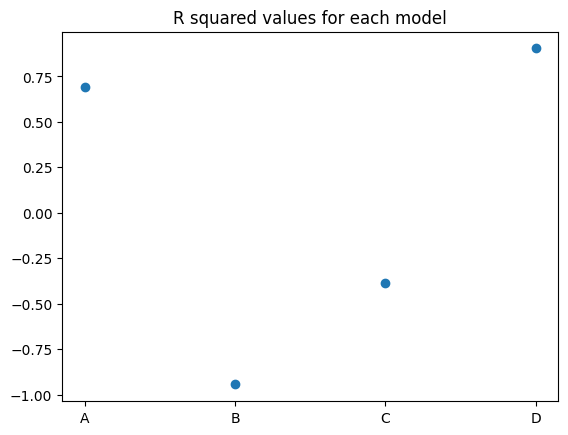

In [ ]:
# Plot the result
x = np.array([0,1,2,3])
y = np.array([modelA_dict['Score'],modelB_dict['Score'],modelC_dict['Score'],modelD_dict['Score']])
xTicks = ['A','B','C','D']
plt.xticks(x, xTicks)
plt.title("R squared values for each model")
#plt.ylim(,top = 1)
plt.scatter(x,y)

In [5]:
# Now plot trajectories using decoder and groundtruth trajectories
decoderBColorbar

'rgb(53,5,245)'

In [6]:
# Fetch decoder data
from sklearn.metrics import r2_score
def plotTrajectories(decoder,k,decoderType = None):
    """This function takes in a decoder dict object which is outputted from the fitModelToData function
    It then generates plots of the actual test trajectories (ground truth) against test trajectories predicted
    from the model.

    It also returns an adjusted r2 score, where in each trajectory, the difference between the predicted trajectory
    and actual trajectory start point has been subtracted from the predicted trajectory. This R2 score
    better reflects the model performance decoding a user's movement from a known start position.

    Inputs:
        @param: decoder - A dict object specifying properties of the decoder gathered 
        from the fitModelToData function
        @param k - A int specifying how many trajectories to plot, must be less or equal to the total number of trajectories
        @param decoderType - Char/String specifying decoder type for saved, if none then plots are not saved
    """
    # Extract true and predicted cursor positions for all test data
    Y_pred = np.zeros(decoder['PredCursorPos'].shape)
    correctY = np.zeros(decoder['TestCursorPos'].shape)
    Y_pred_ = decoder['PredCursorPos']
    correctY_ = decoder['TestCursorPos']

    # In pygame y axis is inverted so this is accounted for by mapping normalised y pos from 0 - 1 to 1 - 0
    correctY[:,1] = 1  - correctY_[:,1] 
    Y_pred[:,1] = 1 - Y_pred_[:,1] 
    correctY[:,0] = correctY_[:,0]
    Y_pred[:,0] = Y_pred_[:,0]

    actualPos = []
    predPos = []
    # Retrieve test go cue data

    rigidBodies1, cursorPos1,cursorVel1,goCues1,targetHits1,timeStamps1, minDof1,maxDof1,c = processTrialData(saveGameLocation + "_test",decoder['DOFOffset'])# make this test 
    plt.figure(figsize=(8,6))
    print("Plotting trajectories without compensating for offset")

    # Gather each trajectory
    for i in range(0,len(goCues1)-1):
        plotFrom = goCues1[i]
        plotUntil = targetHits1[i]

        # Upload trajectory path to list for future stage
        actualPos.append(correctY[plotFrom:plotUntil])
        predPos.append(Y_pred[plotFrom:plotUntil])

        # plot first k trajectories
        if i < k:
            plt.plot(correctY[plotFrom:plotUntil,0],correctY[plotFrom:plotUntil,1],color = colorMap[i%len(colorMap)])
            plt.plot(Y_pred[plotFrom:plotUntil,0],Y_pred[plotFrom:plotUntil,1], "--",color = colorMap[i%len(colorMap)])
            
            # Plot start and end markers (for i = 0 this in addition gives a label in the legend )
            if i == 0:
                plt.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'g',label = 'Actual cursor start position')
                # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                plt.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r',label = 'Estimated cursor start position')
                # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')
            else:
                plt.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'g')
                # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                plt.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r')
                # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')

    ax1 = plt.gca()  # Get current axes


    # Remove top and right spines for the first plot
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Set plotting configuration
    plt.xlabel('Normalised X Position',fontsize = 25,fontweight='bold')
    plt.ylabel('Normalised Y position', fontsize = 25,fontweight='bold')
    plt.xticks([0,1],fontsize = 15)
    plt.yticks([0,1],fontsize = 15)
    #plt.title('Trajectories showing actual and estimated cursor position for each target aquisition performed in test set. \n Each trajectory is shown in a different colour and position estimates are derived from set (b) of rigid bodies',fontsize = 15)
    plt.legend()

    # Save the file if necessary
    if decoderType is not None:
        plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
    plt.show()

    plt.figure(figsize=(8,6))
    print("Plotting trajectories  compensating for offset")
    for i in range(1,len(goCues1)-1,3): # len(goCues1) len(colorMap)
        plotFrom = goCues1[i]
        plotUntil = targetHits1[i]
        # if np.sqrt(np.square(correctY[plotUntil,0] - correctY[plotFrom,0]) + np.square(correctY[plotUntil,1] - correctY[plotFrom,1])) < 0.15:
        #     break

        offset = Y_pred[plotFrom] - correctY[plotFrom]
        Y_pred[plotFrom:plotUntil] = Y_pred[plotFrom:plotUntil] - offset
        if i == 1:
            plt.plot(correctY[plotFrom:plotUntil,0],correctY[plotFrom:plotUntil,1],color = 'k',label = "Ground Truth Trajectory")
            plt.plot(Y_pred[plotFrom:plotUntil,0],Y_pred[plotFrom:plotUntil,1], "--",color = 'k',label="Decoder Predicted Trajectories")
            plt.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'b',label = 'Cursor Start Position')
        elif i < k:
            plt.plot(correctY[plotFrom:plotUntil,0],correctY[plotFrom:plotUntil,1],color = colorMap[(i-1)%len(colorMap)])
            plt.plot(Y_pred[plotFrom:plotUntil,0],Y_pred[plotFrom:plotUntil,1], "--",color = colorMap[(i-1)%len(colorMap)])
            #if i == 0:
                #plt.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'b',label = 'Cursor start position')
                # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
                #plt.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r',label = 'Estimated cursor start position')
                # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')
            #else:
            plt.scatter(correctY[plotFrom,0], correctY[plotFrom,1],s=250, marker=".", color = 'b')
            # plt.scatter(correctY[plotUntil,0], correctY[plotUntil,1], s=100, marker="D", color = 'g')
            #plt.scatter(Y_pred[plotFrom,0], Y_pred[plotFrom,1],s=250, marker=".", color = 'r')
            # plt.scatter(Y_pred[plotUntil,0], Y_pred[plotUntil,1], s=60, marker="D", color = 'r')

    plt.xlabel('Normalised X Position',fontsize = 20,fontweight = 'bold')
    plt.ylabel('Normalised Y Position',fontsize = 20, fontweight = 'bold')
    #plt.title('Trajectories showing actual and estimated cursor position for each target aquisition performed in test set. \n Each trajectory is shown in a different colour and position estimates are derived from set (b) of rigid bodies',fontsize = 15)
    plt.legend(loc="upper right",bbox_to_anchor=(1,1.13),fontsize=50,prop={'weight': 'bold', 'size': 15})
    plt.xticks([0,1],fontsize = 15)
    plt.yticks([0,1],fontsize = 15)

    ax1 = plt.gca()  # Get current axes


    # Remove top and right spines for the first plot
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Save the file if necessary
    if decoderType is not None:
        plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
    plt.show()




    # then subtract mean
    allPredPosX = []
    allPredPosY = []
    allTruePosX = []
    allTruePosY = []
    r2AdjTrajVals = []
    r2TrajVals_ = []
    for idx in range(0,len(actualPos)-1):
        truePosTrajectory = actualPos[idx]
        predPosTrajectory = predPos[idx]
        # plt.plot(truePosTrajectory[:,0],truePosTrajectory[:,1])
        # plt.plot(predPosTrajectory[:,0],predPosTrajectory[:,1])
        # plt.show()
        dist = calcDist(truePosTrajectory[0,:],truePosTrajectory[-1,:])
        #print(dist)
        if dist > 500:
            r2TrajectoryScore = float(r2_score(truePosTrajectory, predPosTrajectory))
            #print(r2TrajectoryScore)
            r2TrajVals_.append(r2TrajectoryScore)
        offset = predPosTrajectory[0] - truePosTrajectory[0]
        predPosTrajectory = predPosTrajectory - offset
        if dist > 500:
            r2TrajectoryScoreAdj = float(r2_score(truePosTrajectory, predPosTrajectory))
            r2AdjTrajVals.append(r2TrajectoryScoreAdj)
        for val in truePosTrajectory:
            allTruePosX.append(val[0])
            allTruePosY.append(val[1])
        for val in predPosTrajectory:
            allPredPosX.append(val[0])
            allPredPosY.append(val[1])

    pos_true = np.zeros((len(allTruePosX),2))
    pos_pred = np.zeros(pos_true.shape)
    pos_true[:,0] = allTruePosX
    pos_true[:,1] = allTruePosY
    pos_pred[:,0] = allPredPosX
    pos_pred[:,1] = allPredPosY
    r2Score = r2_score(pos_true, pos_pred)
    print("R2 val for this decoder: {}".format(r2Score))

    return pos_true, pos_pred, r2Score, r2TrajVals_, r2AdjTrajVals


def calcDist(startPos,endPos):
    ranges = [1100,800]
    return np.sqrt(np.sum([ (ranges[i] * (endPos[i] - startPos[i])) ** 2 for i in range(len(startPos))]))

















Plotting trajectories without compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} traj

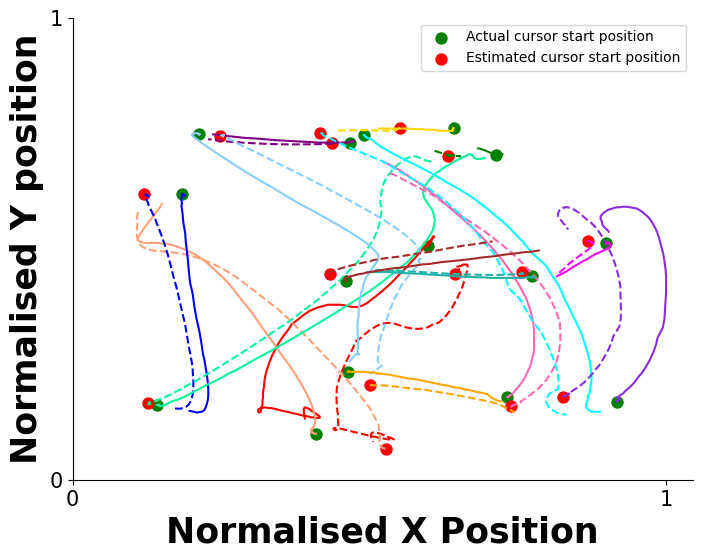

Plotting trajectories  compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_

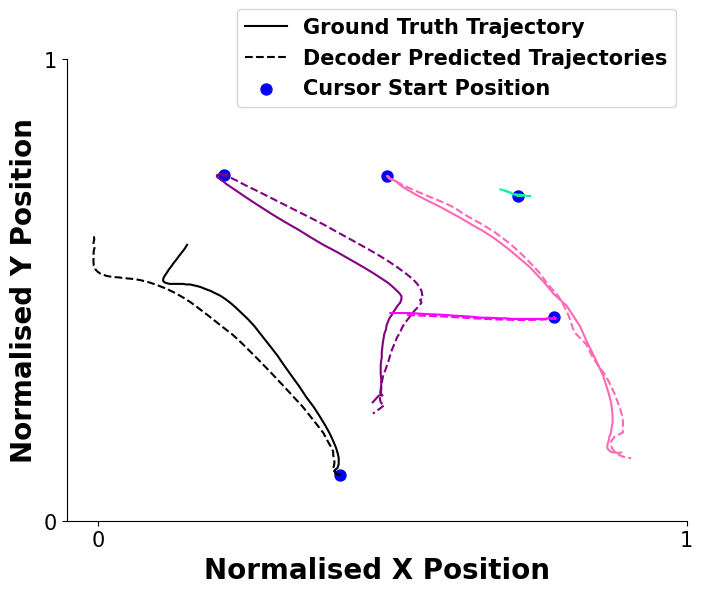

R2 val for this decoder: 0.98327478515297


In [7]:
truePosDecoderA,predPosDecoderA,r2ValAdjDecoderA,r2TrajsA,r2TrajsAdjA = plotTrajectories(modelA_dict,15,'A')
# now need to get true data


In [ ]:
r2TrajsA

[0.8036138713261024,
 0.4237611154867381,
 0.9228736696767188,
 0.8158061495604596,
 0.7380539214047004,
 0.9354880248595101,
 0.64698867101269,
 0.8382995348092461,
 0.13519964603035484,
 0.8813718455801891,
 0.719593110735512]

Plotting trajectories without compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} traj

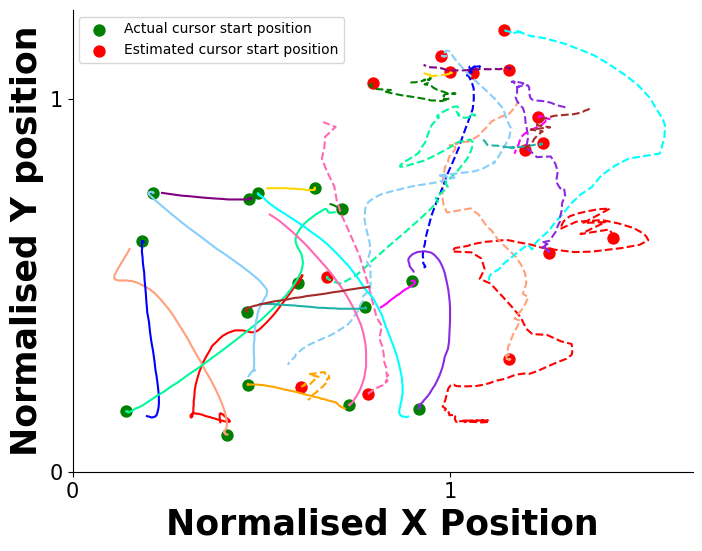

Plotting trajectories  compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_

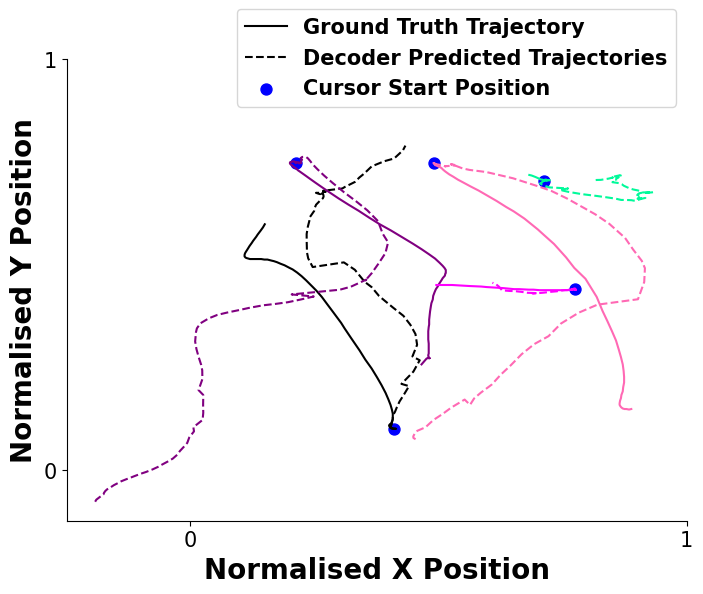

R2 val for this decoder: 0.6873991064933804


In [8]:
truePosDecoderB,predPosDecoderB,r2ValAdjDecoderB,r2TrajsB,r2TrajsAdjB = plotTrajectories(modelB_dict,15,'B')

Plotting trajectories without compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} traj

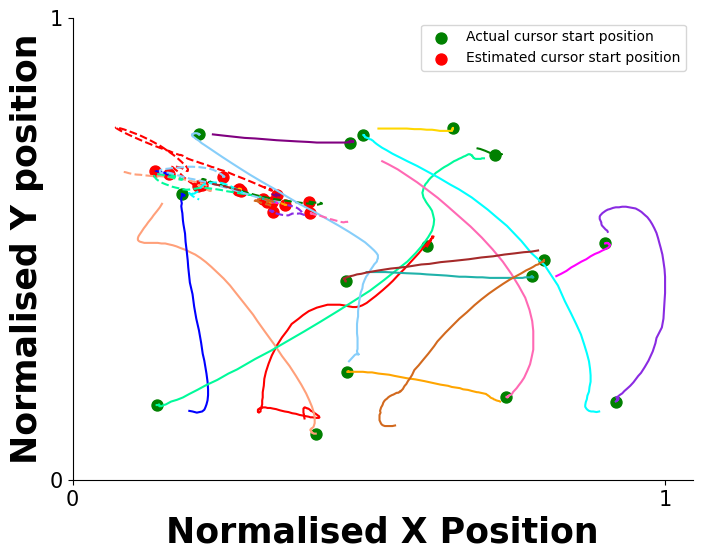

Plotting trajectories  compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_

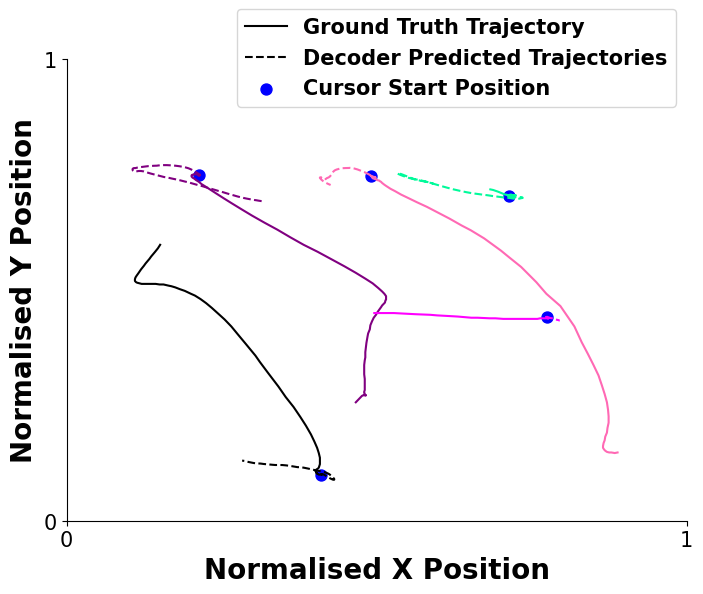

R2 val for this decoder: -0.1765478989172996


In [9]:
truePosDecoderC,predPosDecoderC,r2ValAdjDecoderC,r2TrajsC,r2TrajsAdjC = plotTrajectories(modelC_dict,16,'C')

Plotting trajectories without compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_noOffset".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} traj

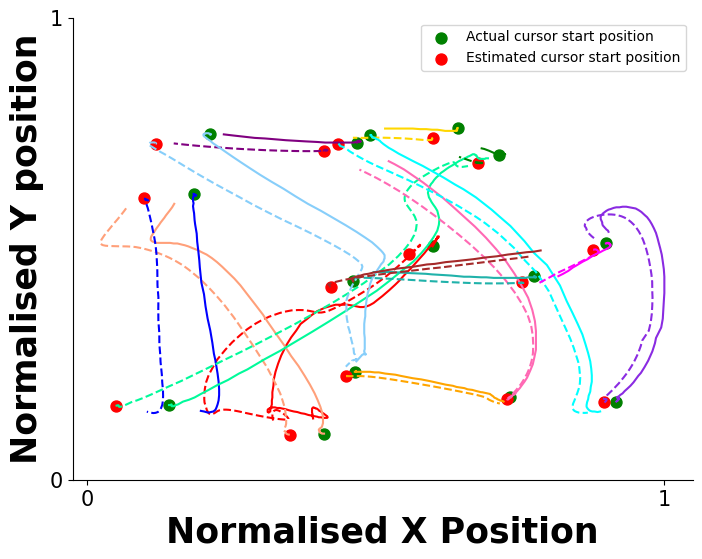

Plotting trajectories  compensating for offset


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_Decoder {} trajectories_withOffset.svg".format(decoderType))
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/3688513397.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation + "_

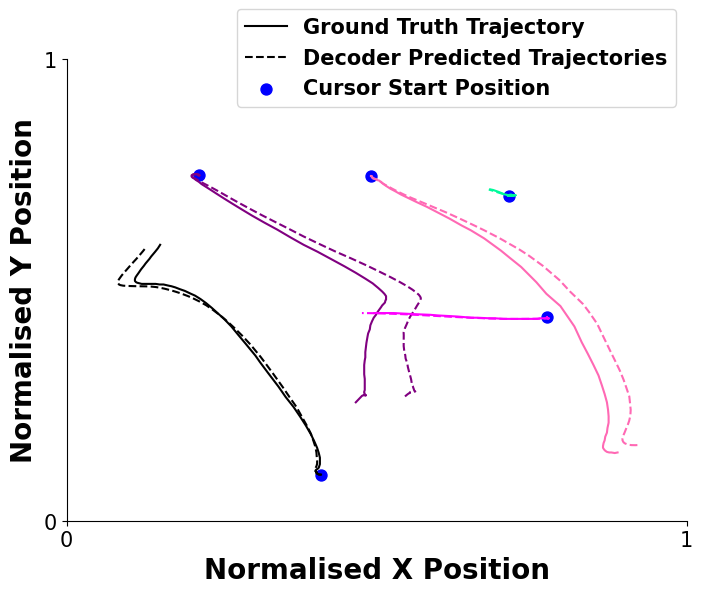

R2 val for this decoder: 0.9943264296405343


In [10]:
truePosDecoderD,predPosDecoderD,r2ValAdjDecoderD,r2TrajsD,r2TrajsAdjD = plotTrajectories(modelD_dict,15,'D')

Now find the angular accuracy metric

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/415157510.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation+"_mag_acc_polarplot.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/415157510.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation+"_mag_acc_polarplot.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/415157510.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation+"_mag_acc_polarplot.svg")


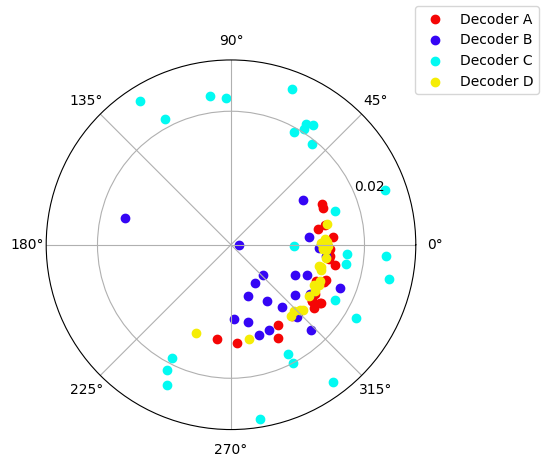

In [11]:
magErrorsA = modelA_dict['Mag Errors']  
magErrorsB = modelB_dict['Mag Errors']
magErrorsC = modelC_dict['Mag Errors']
magErrorsD = modelD_dict['Mag Errors']

angleErrorsA = modelA_dict['Angular Errors']
angleErrorsB = modelB_dict['Angular Errors']
angleErrorsC = modelC_dict['Angular Errors']
angleErrorsD = modelD_dict['Angular Errors']
#fig,ax = plt.subplot(111,polar= True)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.scatter(angleErrorsA,magErrorsA,color = decoderAColorPlt,label = "Decoder A")
ax.scatter(angleErrorsB,magErrorsB,color = decoderBColorPlt, label = 'Decoder B')
ax.scatter(angleErrorsC,magErrorsC,color = decoderCColorPlt, label = 'Decoder C')
ax.scatter(angleErrorsD,magErrorsD,color = decoderDColorPlt, label = 'Decoder D')
ax.set_rticks([0.02]) 
fig.legend(loc='upper right'
           )  # Move legend outside
#plt.legend()
plt.savefig(saveGameLocation+"_mag_acc_polarplot.svg")
plt.show()



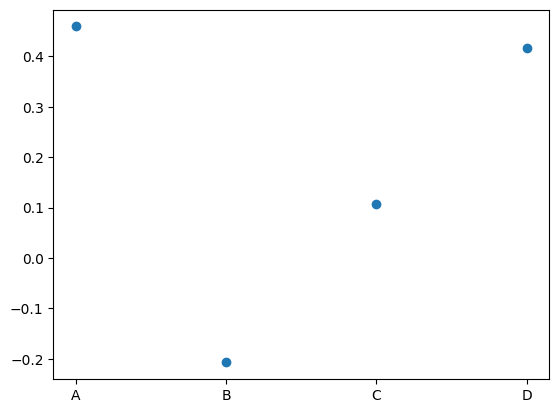

In [12]:
# Plot the result
accA = modelA_dict['Angular Accuracy']
accB = modelB_dict['Angular Accuracy']
accC = modelC_dict['Angular Accuracy']
accD = modelD_dict['Angular Accuracy']

x = np.array([0,1,2,3])
y = np.array([accA,accB,accC,accD])
xTicks = ['A','B','C','D']
plt.xticks(x, xTicks)
#plt.ylim(,top = 1)
plt.scatter(x,y)

In [13]:
#Plot all metrics on same graph
angularAccuracies =  [accA,accB,accC,accD]
magA = modelA_dict['Mag Accuracy']
magB = modelB_dict['Mag Accuracy']
magC = modelC_dict['Mag Accuracy']
magD = modelD_dict['Mag Accuracy']

magAccuracies = [magA,magB,magC,magD]
r2Vals = [modelA_dict['Score'],modelB_dict['Score'],modelC_dict['Score'],modelD_dict['Score']]
r2ValsAdj = [r2ValAdjDecoderA,r2ValAdjDecoderB,r2ValAdjDecoderC,r2ValAdjDecoderD]


x = np.array([0,1,2,3])
y = np.array(angularAccuracies)
xTicks = ['A','B','C','D']
# plt.xticks(x, xTicks)
#plt.ylim(,top = 1)
decoderColorList = [decoderAColorPlt,decoderBColorPlt,decoderCColorPlt,decoderDColorPlt]
# plt.scatter(x,angularAccuracies, label = "Angular Accuracy", color = decoderColorList)
# plt.scatter(x,magAccuracies, label = "Magnitude Accuracy",marker = 'x', color = decoderColorList)
# plt.scatter(x,r2Vals, label = "R2 Value",marker = 'd' ,color = decoderColorList)
# plt.scatter(x,r2ValsAdj, label = "R2 Offset Adjusted Value",marker = 'v' ,color = decoderColorList)
# plt.legend()

# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data
categories = ['A', 'B', 'C','D']




/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/909152826.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation+"_accuracies.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/909152826.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation+"_accuracies.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_19463/909152826.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(saveGameLocation+"_accuracies.svg")


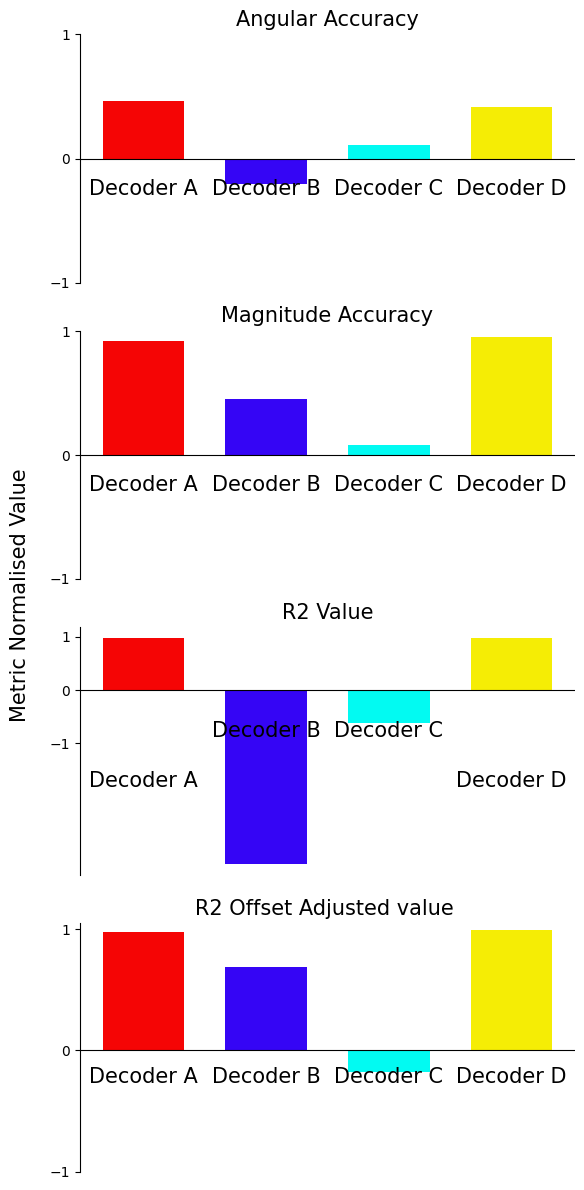

In [14]:
# Width of a bar 
width = 2

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 12))  # Adjust figsize as needed

# Flatten the axs array for easy iteration
axs = axs.flatten()
metrics = [
    angularAccuracies, 
    magAccuracies,
    r2Vals,
    r2ValsAdj
]
categories = [
    "Angular Accuracy",
    "Magnitude Accuracy",
    "R2 Value",
    "R2 Offset Adjusted value "
]
# Iterate through categories and create separate bar plots
for i in range(len(categories)):
    x = np.arange(4)  # Four bars per category
    if i == 0:
        axs[i].bar(x[0] - width, metrics[i][0], width, label= "Decoder A",color = decoderColorList[0])
        axs[i].bar(x[1], metrics[i][1], width, label =  "Decoder B",color = decoderColorList[1])
        axs[i].bar(x[2] + 1* width, metrics[i][2], width, label = "Decoder C",color = decoderColorList[2])
        axs[i].bar(x[3] + 2*width, metrics[i][3], width, label = "Decoder D ",color = decoderColorList[3])
    else:
        axs[i].bar(x[0] - width, metrics[i][0], width,color = decoderColorList[0])
        axs[i].bar(x[1], metrics[i][1], width,color = decoderColorList[1])
        axs[i].bar(x[2] + width, metrics[i][2], width,color = decoderColorList[2])
        axs[i].bar(x[3] + 2*width, metrics[i][3], width,color = decoderColorList[3])

    # Setting titles and xticks for each subplot
    axs[i].set_title(f'{categories[i]}', fontsize = 15)
    axs[i].set_xticks([-2,1,4,7])
    axs[i].set_xticklabels(['Decoder A', 'Decoder B', 'Decoder C', 'Decoder D'],fontsize = 15)
    axs[i].set_yticks([-1,0,1])
    axs[i].axhline(0, color='black', linewidth=0.8)
    axs[i].tick_params(axis='x', length=0)

    # Remove top, right, and bottom borders, keep left
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].tick_params(axis='x', which='major', pad=-75)  # Move x-tick labels closer to y=0 line

    # Adjust position of the first x-axis label
    if i == 2:  # For the first subplot
        for label in axs[i].get_xticklabels():
            if label.get_text() == 'Decoder C':  # Identify the label by its text
                label.set_y(0.2)  # Adjust the vertical position
            if label.get_text() == 'Decoder B':  # Identify the label by its text
                label.set_y(0.2)  # Adjust the vertical position

#fig.suptitle('Overall Title for All Subplots', fontsize=15)
#fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))  # Move legend outside

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(left = 0.1,top=0.88)  # Adjust the top of the subplots to fit the super title


#fig.text(0.7, 0.07, 'Metric Type', ha='center', va='center',fontsize = 15)
fig.text(0.05, 0.5,'Metric Normalised Value' , ha='center', va='center', rotation='vertical', fontsize = 15)


# Adjust layout
plt.tight_layout()
fig.subplots_adjust(left = 0.15) 
plt.savefig(saveGameLocation+"_accuracies.svg")
# Show the plot
plt.show()

In [15]:
# Functions for color coding schematic

from bs4 import BeautifulSoup
import plotly.graph_objects as go
from svgpathtools import parse_path
import numpy as np

from lib_streamAndRenderDataWorkflows.config_streaming import bodyParts


def extractShapesFromSVG(location,parts):
    """Extracts all shapes from an svg file

    Inputs:
        @param: location: relative location of svg file
        @param: parts: list of names of defined parts that map to shapes (should be in order of values that correspond to color strength
        of each shape) Additionally the list of names must be the same as the list of named polygons on the svg file

    Returns:
        @param: elements: list of lists, each list is the ordered vertices in each polygon, each vertex
        is supplied as an index corresponding to the location of the vertex in points
        @param: points: List of (x,y) of each point
        @param: path_elements - list of raw path data from the svg for all shapes
        @param: partMappings - mapping of each shape to its  part (value is -1 if it is just a line)
        """
    
    # Load the SVG content
    with open(location, 'r') as file:
        svg_content = file.read()

    # Create a BeautifulSoup object and specify the lxml parser
    soup = BeautifulSoup(svg_content, 'html.parser')

    # Find all the path elements
    path_elements = soup.find_all('path')








    # Initialize lists for points and elements
    points = [] # holds all points
    elements = [] # holds each polygon

    # Function to add a point if it's not already in the list and return its index
    def add_point(point):
        if point not in points:
            points.append(point)
        return points.index(point)
    #print(path_elements[0])
    partMappings = []
    # describes which polygon each rigid body is responsible, -1 indicates it is just a line

    # Iterate through each path (polygon) and update points / elements
    for pathRawData in path_elements:
        path_string = str(parse_path(pathRawData))
        truthList = [parts[i] in path_string for i in range(0,len(parts))]
        try:
            partMappings.append( truthList.index(1) )
        except:
            partMappings.append( -1 )
        
        path_data = parse_path(pathRawData.get('d'))
        # Iterate through each line in the path
        element_ =  []
        for i,line in enumerate(path_data):
            # Extract start and end points 
            start_point = (line.start.real, -line.start.imag)
            
            end_point = (line.end.real, -line.end.imag)

            # Get indices of start and end points
            start_index = add_point(start_point)
            if i == 0:
                element_.append(start_index)
            end_index = add_point(end_point)

            # Add element as indices of points
            element_.append(end_index)
        elements.append(element_)

    return elements, points, path_elements,partMappings



def drawObject(points,elements,colors,partMapping,savePath = "Composite image.svg",lineColor = '#000000',lightColor = None, darkColor = None ):
    """
    This function draws the polygons passed in elements to the screen
    requires import plotly.graph_objects as go
    and from bs4 import BeautifulSoup


    Inputs:
        @param points: list of all points (x,y) that polygon vertices form at
        @param elements: List of lists corresponding to list of vertices in each polygon, each vertex entry should be the index of the vertex from the list points 
        @param colors: List of colors for all defined shapes ( not including lines)
        @param partMapping: pointer to map each polygon to each color, if not a defined shape, the value is -1
        @param (optional) savePath: saves composite image color coded map to savePath location
        @param (optional) lineColor: color of any non defined shapes (lines) set as black
    """
    nodes=np.asarray(points).transpose()
    shapeIdx = 0
    polygons= []
    
    # Create a dummy scatter for color bar
    #print(lightColor,darkColor)
    colorbar_trace = go.Scatter(
        x=[None], 
        y=[None], 
        mode='markers',
        
        marker=dict(
            
            colorscale=[(0, lightColor), (1, darkColor)], # Adjust the colorscale based on your color range
            cmin=0,
            cmax=1,
            colorbar=dict(title="",
                        tickvals = []
                       ) # Add your color bar title here

        ),
        hoverinfo='none'
    )
    polygons.append(colorbar_trace)
    for k, element in enumerate(elements):
        if partMapping[k] != -1:
            # Fill shape
            colorIdx = partMapping[k]
            fillcolor = colors[colorIdx]
            shapeIdx += 1
        else:
            # Fill line
            fillcolor = lineColor

        polygons.append(go.Scatter(x=nodes[0][element],y=nodes[1][element],
            mode='lines',line=dict(color=lineColor, width=2), fill='toself',fillcolor=fillcolor))
        
    # Now plot data
        
    axis = dict(showline=False, zeroline=False, showgrid = False,ticks='', showticklabels=False)

    fig = go.Figure(polygons)

    fig.update_layout(width=600, height=900, showlegend=False,xaxis=axis, yaxis=axis,template="none")
    if savePath != None:    
        fig.write_image(savePath)
    fig.show()

def get_color_hex(value, light_color, dark_color):
    """Function returns hexadecimal color based on value between 0 and 1."""
    # Check value is bounded first
    value = max(0, min(1, value))

    # Interpolate between light and dark colors
    r = int(light_color[0] + value * (dark_color[0] - light_color[0]))
    g = int(light_color[1] + value * (dark_color[1] - light_color[1]))
    b = int(light_color[2] + value * (dark_color[2] - light_color[2]))

    # Return as hexadecimal
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)
    







In [21]:
# Code for color code Plot for Decoder A

white =  (255, 255, 255) # White
whiteColorBar = 'rgb(255, 255, 255)'
darkColor = 'rgb(245,5,5)'
print("Body Heatmap for decoder A x-axis")
# Retrieve and reshape data 
coefficientsModelA_x = modelA_dict['Coeff'][0]
coefficientsModelA_x_reshaped = coefficientsModelA_x.reshape(18,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelA_sumDOF = np.sum(np.abs(coefficientsModelA_x_reshaped),1)
coefficientsModelA_sumDOF = coefficientsModelA_sumDOF / sum(coefficientsModelA_sumDOF)

# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_A_X = np.zeros((19))
coefficients_A_X[0:12] = coefficientsModelA_sumDOF[0:12]
coefficients_A_X[13:19] = coefficientsModelA_sumDOF[12:18]

# Normalise so the max value is 1
coefficients_A_X = coefficients_A_X/ max(coefficients_A_X)






# Set location and import body parts ( list of names of bodies that coefficients correspond to)
location = '../../BodyGraphics/body.svg'

# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient
colours = [get_color_hex(i,white,decoderAColor) for i in coefficients_A_X]


# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderA_xAxis.svg",
           lightColor = whiteColorBar, darkColor = decoderAColorbar)
#print(coefficients_A_X)


# Now for y plane


print("Body Heatmap for decoder A y-axis")
# Retrieve and reshape data 
coefficientsModelA_y = modelA_dict['Coeff'][1]
coefficientsModelA_y_reshaped = coefficientsModelA_y.reshape(18,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelA_sumDOF = np.sum(np.abs(coefficientsModelA_y_reshaped),1)
coefficientsModelA_sumDOF = coefficientsModelA_sumDOF / sum(coefficientsModelA_sumDOF)

# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_A_Y = np.zeros((19))
coefficients_A_Y[0:12] = coefficientsModelA_sumDOF[0:12]
coefficients_A_Y[13:19] = coefficientsModelA_sumDOF[12:18]

# Normalise so the max value is 1
coefficients_A_Y = coefficients_A_Y/ max(coefficients_A_Y)








# Set location and import body parts ( list of names of bodies that coefficients correspond to)
location = '../../BodyGraphics/body.svg'

# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient
colours = [get_color_hex(i,white,decoderAColor) for i in coefficients_A_Y]


# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderA_yAxis.svg",
        lightColor = whiteColorBar, darkColor = decoderAColorbar)
#print(coefficients_A_X)



Body Heatmap for decoder A x-axis


Body Heatmap for decoder A y-axis


In [22]:
# Color code Plot for Decoder B
print("Body Heatmap for decoder B x-axis")
# Retrieve and reshape data 
coefficientsModel_x = modelB_dict['Coeff'][0]
coefficientsModel_x_reshaped = coefficientsModel_x.reshape(15,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelSumDOF = np.sum(np.abs(coefficientsModel_x_reshaped),1)
coefficientsModelSumDOF = coefficientsModelSumDOF / sum(coefficientsModelSumDOF)

# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_X = np.zeros((19))
coefficients_X[0:9] = coefficientsModelSumDOF[0:9]
coefficients_X[13:19] = coefficientsModelSumDOF[9:15]

# Normalise so the max value is 1
coefficients_X = coefficients_X/ max(coefficients_X)




# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient
colours = [get_color_hex(i,white,decoderBColor) for i in coefficients_X]


# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderB_xAxis.svg",
           lightColor=whiteColorBar,darkColor=decoderBColorbar)
#print(coefficients_A_X)


# For y axis
print("Body Heatmap for decoder B y-axis")
# Retrieve and reshape data 
coefficientsModel_y = modelB_dict['Coeff'][1]
coefficientsModel_y_reshaped = coefficientsModel_y.reshape(15,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelSumDOF = np.sum(np.abs(coefficientsModel_y_reshaped),1)
coefficientsModelSumDOF = coefficientsModelSumDOF / sum(coefficientsModelSumDOF)

# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_Y = np.zeros((19))
coefficients_Y[0:9] = coefficientsModelSumDOF[0:9]
coefficients_Y[13:19] = coefficientsModelSumDOF[9:15]

# Normalise so the max value is 1
coefficients_Y = coefficients_Y/ max(coefficients_Y)


# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient
colours = [get_color_hex(i,white,decoderBColor) for i in coefficients_Y]


# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderB_yAxis.svg",
lightColor=whiteColorBar,darkColor=decoderBColorbar)
#print(coefficients_A_X)





Body Heatmap for decoder B x-axis


Body Heatmap for decoder B y-axis


In [23]:
print("Body Heatmap for decoder C x-axis")
# Plot for Decoder C

# Retrieve and reshape data 
coefficientsModel_x = modelC_dict['Coeff'][0]

coefficientsModel_x_reshaped = coefficientsModel_x.reshape(1,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelSumDOF = np.sum(np.abs(coefficientsModel_x_reshaped),1)
coefficientsModelSumDOF = coefficientsModelSumDOF / sum(coefficientsModelSumDOF)


# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_X = np.zeros((19))
coefficients_X[8] = coefficientsModelSumDOF


# Normalise so the max value is 1
coefficients_X = coefficients_X/ max(coefficients_X)




# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient

colours = [get_color_hex(i,white,decoderCColor) for i in coefficients_X]

print(colours)
# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderC_xAxis.svg",lightColor = whiteColorBar, darkColor = decoderCColorbar)
#print(coefficients_A_X)


print("Body Heatmap for decoder C y-axis")
# Plot for Y axis

# Retrieve and reshape data 
coefficientsModel_y = modelC_dict['Coeff'][1]

coefficientsModel_y_reshaped = coefficientsModel_y.reshape(1,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelSumDOF = np.sum(np.abs(coefficientsModel_y_reshaped),1)
coefficientsModelSumDOF = coefficientsModelSumDOF / sum(coefficientsModelSumDOF)


# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_Y = np.zeros((19))
coefficients_Y[8] = coefficientsModelSumDOF


# Normalise so the max value is 1
coefficients_Y = coefficients_Y/ max(coefficients_Y)

# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient

colours = [get_color_hex(i,white,decoderCColor) for i in coefficients_Y]

print(colours)
# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderC_yAxis.svg",lightColor = whiteColorBar, darkColor = decoderCColorbar )
#print(coefficients_A_X)




Body Heatmap for decoder C x-axis
['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#02faf2', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']


Body Heatmap for decoder C y-axis
['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#02faf2', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']


In [24]:
print("Body Heatmap for decoder D x-axis")
# Plot for Decoder D

# Retrieve and reshape data 
coefficientsModel_x = modelD_dict['Coeff'][0]

coefficientsModel_x_reshaped = coefficientsModel_x.reshape(1,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelSumDOF = np.sum(np.abs(coefficientsModel_x_reshaped),1)
coefficientsModelSumDOF = coefficientsModelSumDOF / sum(coefficientsModelSumDOF)


# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_X = np.zeros((19))
coefficients_X[12] = coefficientsModelSumDOF


# Normalise so the max value is 1
coefficients_X = coefficients_X/ max(coefficients_X)




# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient

colours = [get_color_hex(i,white,decoderDColor) for i in coefficients_X]

print(colours)
# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderD_xAxis.svg",lightColor=whiteColorBar,darkColor = decoderDColorbar)
#print(coefficients_A_X)


print("Body Heatmap for decoder D y-axis")
# Plot for Y axis

# Retrieve and reshape data 
coefficientsModel_y = modelD_dict['Coeff'][1]

coefficientsModel_y_reshaped = coefficientsModel_y.reshape(1,6)

# Sum all coefficients across all rotations and positions for each rigid body and normalise
coefficientsModelSumDOF = np.sum(np.abs(coefficientsModel_y_reshaped),1)
coefficientsModelSumDOF = coefficientsModelSumDOF / sum(coefficientsModelSumDOF)


# Create a list with all rigid bodies in skeleton and set rigid bodies that don't have components to 0
coefficients_Y = np.zeros((19))
coefficients_Y[12] = coefficientsModelSumDOF


# Normalise so the max value is 1
coefficients_Y = coefficients_Y/ max(coefficients_Y)

# Set location and import body parts ( list of names of bodies that coefficients correspond to)


# Extract shape data from the svg file
elements,points,pathElements,bodyPartMapping = extractShapesFromSVG(location=location,parts=bodyParts)

# Set colours for each coefficient

colours = [get_color_hex(i,white,decoderDColor) for i in coefficients_Y]

print(colours)
# Draw the object 
drawObject(points,elements,colours,bodyPartMapping,saveGameLocation+"_bodySchematic_decoderD_yAxis.svg",lightColor=whiteColorBar,darkColor = decoderDColorbar)
#print(coefficients_A_X)




Body Heatmap for decoder D x-axis
['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#f5ed05', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']


Body Heatmap for decoder D y-axis
['#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#f5ed05', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff']
